In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nolds
import numpy as np

In [2]:
df = pd.read_csv('btc.csv')
df.head()

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2009-01-03,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df["date"] = df["date"].astype("datetime64")
df = df.set_index("date")

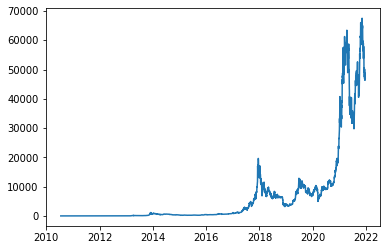

In [4]:
plt.figure()
plt.plot(df['PriceUSD'])

In [5]:
price = df['PriceUSD']
delta = price.diff() / price.index.to_series().diff().dt.total_seconds()

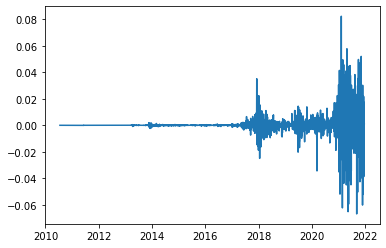

In [10]:
plt.plot(delta)

In [11]:
acc = delta.diff() / delta.index.to_series().diff().dt.total_seconds()

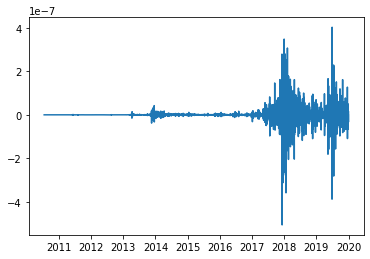

In [12]:
plt.plot(acc[acc.index.year < 2020])

In [13]:
vol = pd.read_csv('btc_vol.csv')
vol.head()

,Date,Real Volume
0,2021-01-11,2.732236e+10
1,2021-02-23,2.659390e+10
2,2021-09-07,2.615177e+10
3,2021-05-19,2.597642e+10
4,2021-07-26,2.413878e+10


In [14]:
vol["Date"] = vol["Date"].astype("datetime64")
vol = vol.set_index("Date")
vol.head()
vol = vol['Real Volume']

<AxesSubplot:xlabel='Date'>

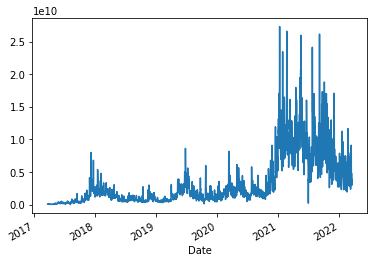

In [15]:
vol.plot()

In [16]:
force = vol * acc

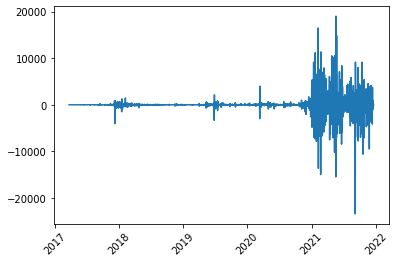

In [17]:
plt.figure()
plt.xticks(rotation=45)
plt.plot(force)

In [18]:
df2 = pd.read_csv('btc2.csv')
df2.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,Mar-26-2022,44532.133852,46842.719552,44438.296186,46842.719552,3.898962e+10,8.536057e+11
1,Mar-25-2022,44314.415815,44769.885100,44162.890660,44533.217420,5.203335e+10,8.430290e+11
2,Mar-24-2022,43997.597868,45054.744000,43775.982800,44365.182550,6.497562e+10,8.408199e+11
3,Mar-23-2022,42901.787989,44196.381252,42726.384662,43948.891125,5.830515e+10,8.228429e+11
4,Mar-22-2022,42362.023226,42925.977980,41810.056890,42925.977980,5.543447e+10,8.022165e+11


In [19]:
df2["Date"] = df2["Date"].astype("datetime64")
df2 = df2.set_index("Date")

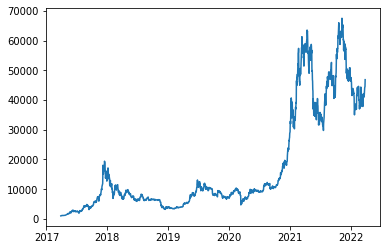

In [20]:
plt.plot(df2['Close'])

In [21]:
price2 = df2['Close']
delta2 = price2.diff() / price2.index.to_series().diff().dt.total_seconds()

<AxesSubplot:xlabel='Date'>

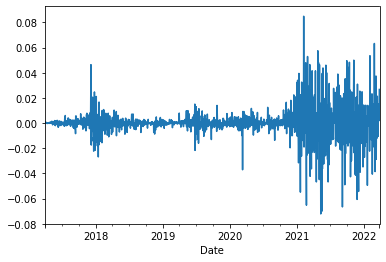

In [22]:
delta2.plot()

In [23]:
acc2 = delta2.diff() / delta2.index.to_series().diff().dt.total_seconds()

<AxesSubplot:xlabel='Date'>

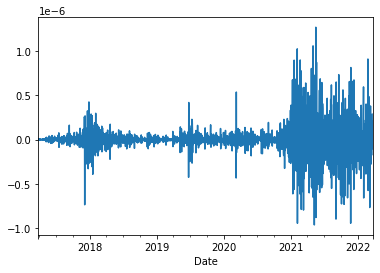

In [24]:
acc2.plot()

In [27]:
vol2 = df2['Volume']

<AxesSubplot:xlabel='Date'>

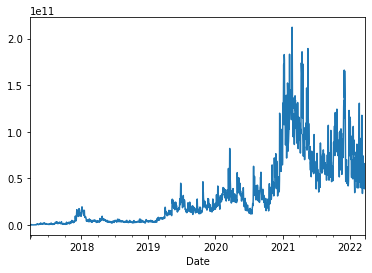

In [28]:
vol2.plot()

In [29]:
force2 = vol2 * acc2

<AxesSubplot:xlabel='Date'>

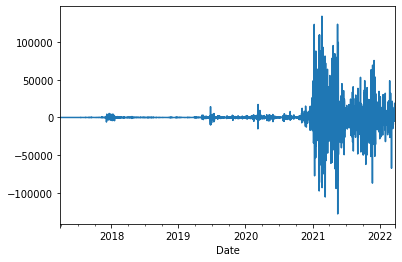

In [30]:
force2.plot()

In [33]:
force2.cumsum().plot()

<AxesSubplot:xlabel='Date'>

In [34]:
force2.head(10)

Date
2022-03-26             NaN
2022-03-25             NaN
2022-03-24    18639.504716
2022-03-23    -1939.010633
2022-03-22    -4504.746639
2022-03-21     4192.370386
2022-03-20    -5058.207008
2022-03-19     8057.877149
2022-03-18     4533.078777
2022-03-17    -9353.733595
dtype: float64

In [32]:
y2022 = price2.loc[price2.index.year == 2022]
m3 = y2022[y2022.index.month == 3]
m3.plot()

<AxesSubplot:xlabel='Date'>